<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/OpenCV_PyTesseract_cc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,680 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.0 MB/s eta 0:00:00


In [3]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

Cloning into 'OCR_for_Bank_Statement'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 97 (delta 32), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (97/97), 13.12 MiB | 6.91 MiB/s, done.


In [4]:
import cv2
import glob
import numpy as np
import pandas as pd
import pytesseract
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[14, 8]

import warnings
warnings.filterwarnings('ignore')

In [5]:
#define file path
filename = 'OCR_for_Bank_Statement/Dataset2/cc2.png'

#convert image to string
image = cv2.imread(filename)

# Re-scale the image before passing it to tesseract and do
scale_factor = 6

In [6]:
#Image Processing

def image_scale(image, scale_factor):
  # Re-scale the image before passing it to tesseract and do
  img = cv2.resize(image, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
  return img

img = image_scale(image, scale_factor)
  

In [7]:
# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 2)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True) 
# Creating a copy of image
im2 = img.copy()

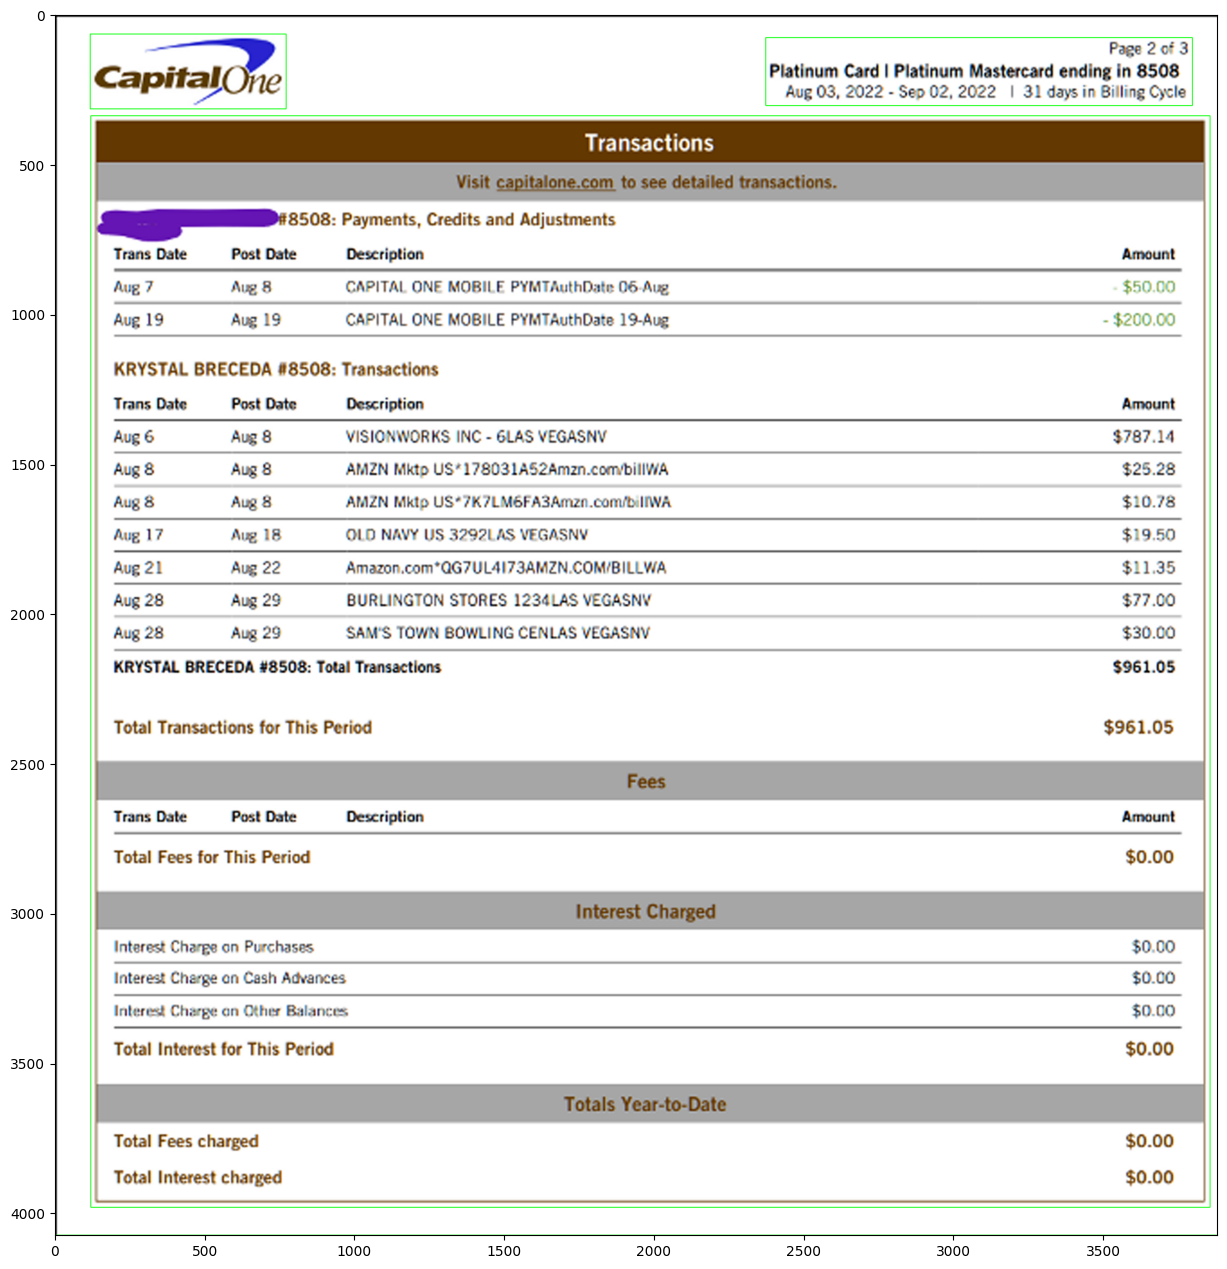

In [8]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(im2)
plt.show()

In [9]:
for n,cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    #file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    #file.write(text)
    #file.write("\n")
     
    # Close the file
    #if n == 4:
    print(f'(Conrours {n}:' + text)

(Conrours 0: 

 

Transactions

#8508: Payments, Credits and Adjustments
Trans Date Post Date Description
Aug 7 Aug 8 CAPITAL ONE MOBILE PYMTAuthDate 06.Aug
Aug 19 Aug 19 CAPITAL ONE MOBILE PYMTAuthDate 19-Aug

KRYSTAL BRECEDA #8508: Transactions

Trans Date Post Date Description

Aug 6 Aug 8 VISIONWORKS INC - GLAS VEGASNYV

Aug 8 Aug 8 AMZN Mktp US*178031AS2Amz2n.compbillWA
Aug 8 Aug 8 AMZN Mktp US*7K7LM6FA3Amzn.com/thlIWA
Aug 17 Aug 18 OLD NAVY US 3292LAS VEGASNY

Aug 21 Aug 22 Amazon.com*QG7UL4I73AMZN.COM/BILLWA
Aug 28 Aug 29 BURLINGTON STORES 1234LAS VEGASNYV
Aug 28 Aug 29 SAM'S TOWN BOWLING CENLAS VEGASNV
KRYSTAL BRECEDA #8508: Total Transactions

Total Transactions for This Period

Trans Date Post Date Description

Total Fees for This Period

Interest Charge on Purchases
Interest Charge on Cash Advances

Interest Charge an Other Balances

Total Interest for This Period

Total Fees charged
Total Interest charged

Amount
- $50.00
- $200.00

Amount
$787.14
$25.28
$10.78
$19.50
$11.3

In [13]:
ground_value = ''' 

 

Transactions

8508: Payments, Credits and Adjustments
Trans Date —— Post Date Description
Aug 7 Aug 8 CAPITAL ONE MOBILE PYMTAuthDate 06-Aug
Aug 19 Aug 19 CAPITAL ONE MOBILE PYMTAuthDate 19-Aug

KRYSTAL BRECEDA #8508: Transactions
Trans Date Description
Aug 6 Aug 8 VISIONWORKS INC - GLAS VEGASNYV
Aug 8 Aug 8 AMZN Mktp US*178031AS2Amzn.com/billWA

Page 2 of 3
Platinum Card | Platinum Mastercard ending in 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

Amount
$787.14
$25.28

 

Aug 8 Aug 8 AMZN Mktp US*7K7LM6FA3Amzn.conmvbilIWA
Aug 17 Aug 18 OLD NAVY US 3292LAS VEGASNY
Aug 21 Aug 22 Amazon.com*QG7UL4173AMZN.COM/BILLWA
Aug 28 Aug 29 BURLINGTON STORES 1234LAS VEGASNY
Aug 28 Aug 29 SAM'S TOWN BOWLING CENLAS VEGASNY
KRYSTAL BRECEDA #8508: Total Transactions

Total Transactions for This Period

Trans Date Post Date Description

Total Fees for This Period

Interest Charge on Purchases
Interest Charge on Cash Advances
Interest Charge an Other Balances

Total Interest for This Period

Total Fees charged
Total Interest charged

$10.78
$19.50
$11.35
$77.00
$30.00
$961.05

$961.05
'''

In [14]:
from Levenshtein import distance

text = ''' 

 

Transactions

8508: Payments, Credits and Adjustments
Trans Date —— Post Date Description
Aug 7 Aug 8 CAPITAL ONE MOBILE PYMTAuthDate 06-Aug
Aug 19 Aug 19 CAPITAL ONE MOBILE PYMTAuthDate 19-Aug

KRYSTAL BRECEDA #8508: Transactions
Trans Date Description
VISIONWORKS INC - GLAS VEGASNYV
AMZN Mktp US*178031AS2Amzn.combillWA

Page 2 of 3
Platinum Card | Platinum Mastercard ending in 8508
Aug 03, 2022 - Sep 02, 2022 | 31 days in Billing Cycle

Amount
$787.14
$25.28

 

AMZN Mktp US*7K7LM6FA3Amzn.conmvbilIWA
Aug 17 Aug 18 OLD NAVY US 3292LAS VEGASNY
Aug 21 Aug 22 Amazon.com*QG7UL4173AMZN.COM/BILLWA
Aug 28 Aug 29 BURLINGTON STORES 1234LAS VEGASNY
Aug 28 Aug 29 SAM'S TOWN BOWLING CENLAS VEGASNY
KRYSTAL BRECEDA #8508: Total Transactions

Total Transactions for This Period

Trans Date Post Date Description

Total Fees for This Period

Interest Charge on Purchases
Interest Charge on Cash Advances
Interest Charge an Other Balances

Total Interest for This Period

Total Fees charged
Total Interest charged

$10.78
$19.50
$11.35
$77.00
$30.00
$961.05

$961.05

$0.00

$0.00
$0.00
$0.00
$0.00
$0.00

$0.00
$0.00
'''


print(distance(ground_value, text))

88


In [15]:
from difflib import SequenceMatcher

sm = SequenceMatcher(None, text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.9664855072463768
